In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
# IRIS Plants Dataset
skdata = datasets.load_iris()

# Breast Cancer Dataset
# skdata = datasets.load_breast_cancer()

# Digits Dataset
# skdata = datasets.load_digits()

# Wine Dataset
# skdata = datasets.load_wine()


# Standard Scaling
# x = StandardScaler().fit_transform(skdata.data)
# y = skdata.target

# MinMax Scaling
# x = MinMaxScaler().fit_transform(skdata.data)
# y = skdata.target

x = skdata.data
y = skdata.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print('Train Data - ', x_train.shape, y_train.shape)
print('Test Data  - ', x_test.shape, y_test.shape)

Train Data -  (105, 4) (105,)
Test Data  -  (45, 4) (45,)


# K-Means

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_train);

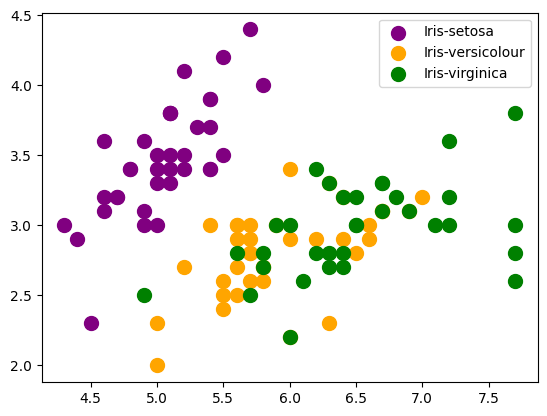

In [ ]:
#Visualising the clusters
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_train[y_train == 2, 0], x_train[y_train == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.legend()

In [ ]:
y_pred = kmeans.predict(x_test)
print('Test - ', y_test)
print('Pred - ', y_pred)

Test -  [2 1 1 2 2 2 2 0 0 2 1 0 0 0 1 0 0 0 2 1 0 2 1 1 0 2 2 1 1 1 2 2 1 0 0 0 2
 2 2 0 1 2 2 1 1]
Pred -  [2 1 2 2 2 2 1 0 0 1 1 0 0 0 1 0 0 0 2 1 0 2 1 1 0 2 2 1 1 1 2 1 1 0 0 0 2
 2 2 0 1 2 2 1 1]


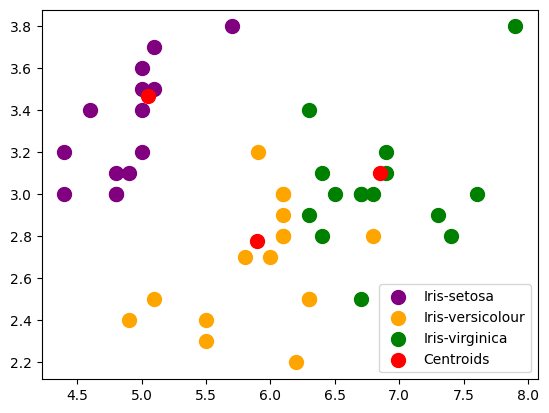

In [ ]:
#Visualising the clusters
plt.scatter(x_test[y_pred == 0, 0], x_test[y_pred == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_test[y_pred == 1, 0], x_test[y_pred == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_test[y_pred == 2, 0], x_test[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# Best K

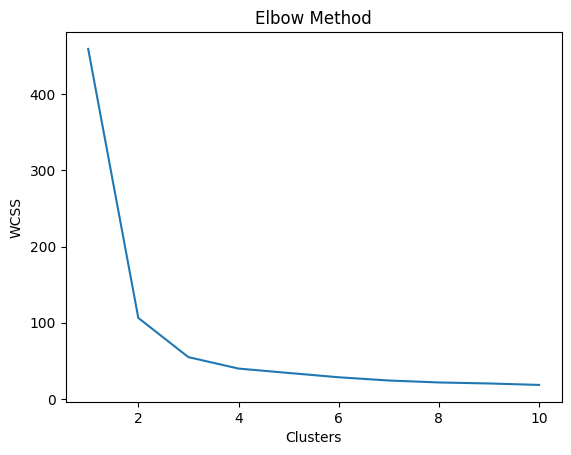

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()